In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

In [26]:
image_height = 1600
image_width = 1200
dpi = 100

In [27]:
urls = [
    f"https://placekitten.com/{image_width}/{image_height}"
    ]

In [28]:
images = list()

for url in urls:
    image = io.imread(url)
    images.append(image)

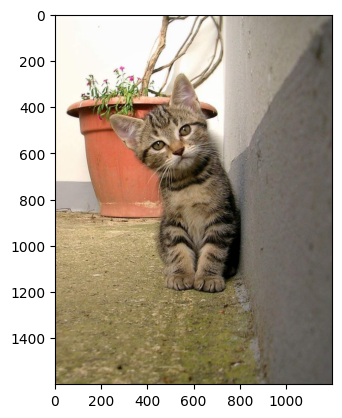

In [29]:
img = images[0]
plt.imshow(img)

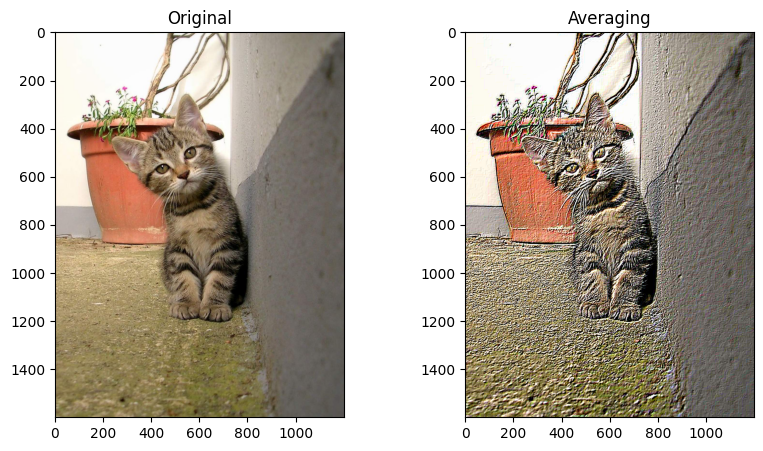

In [30]:
color_image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel_size = 1
kernel = np.array([
  [-7, -1, 0],
  [-1, 1, 1],
  [0, 1, 7]
])

"""
blurred = cv2.GaussianBlur(img, (3, 99), 0)
"""
dst = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(dst), plt.title('Averaging')
plt.show()


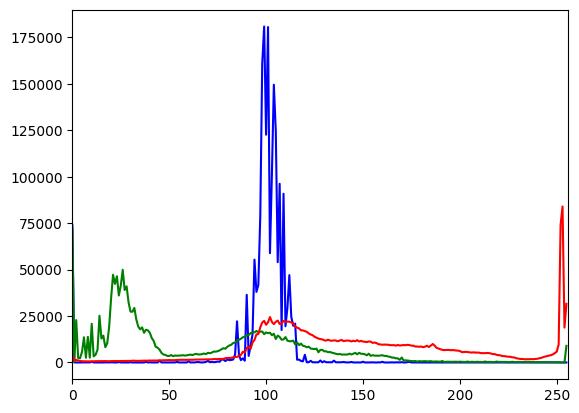

(<Axes: title={'center': 'Original'}>,
 Text(0.5, 1.0, 'Original'))

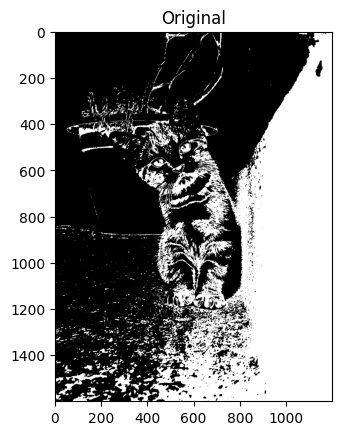

In [31]:
color_image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([color_image_hsv], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()


mask = cv2.inRange(color_image_hsv, (0,0,70), (255, 255, 130))
plt.subplot(111), plt.imshow(mask, cmap="gray"), plt.title('Original')

(<Axes: title={'center': 'edges'}>,
 Text(0.5, 1.0, 'edges'))

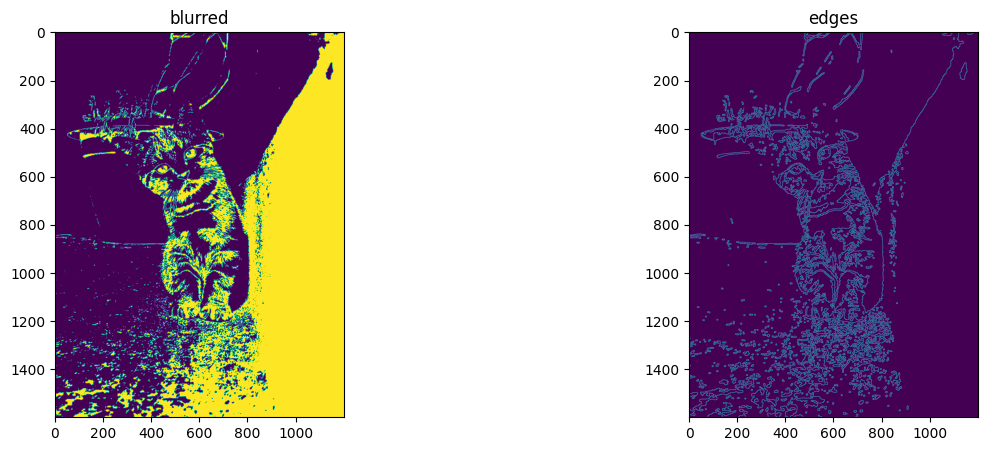

In [32]:
blurred = cv2.GaussianBlur(mask, (11, 11), 0)
edges = cv2.Canny(blurred,25,255,L2gradient=False)

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(mask), plt.title('blurred')
plt.subplot(122), plt.imshow(edges), plt.title('edges')

(<Axes: title={'center': 'blurred'}>,
 Text(0.5, 1.0, 'blurred'))

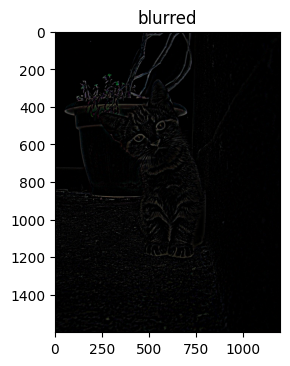

In [33]:
blurred = cv2.GaussianBlur(img, (49, 49), 0)

res = cv2.subtract(blurred, img)
plt.subplot(121), plt.imshow(res), plt.title('blurred')

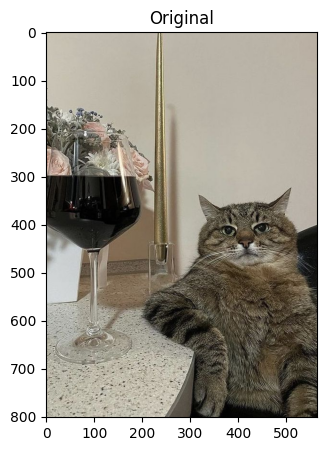

(<Axes: title={'center': 'blurred'}>,
 Text(0.5, 1.0, 'blurred'))

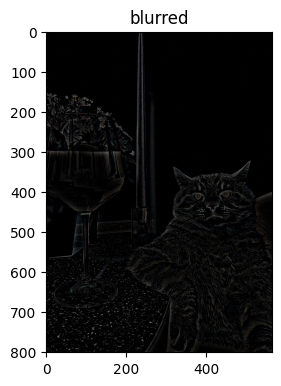

In [52]:
image2 = io.imread("cat.jpg")
plt.figure(figsize=(15, 5))
plt.subplot(111), plt.imshow(image2), plt.title('Original')
plt.show()


blurred = cv2.GaussianBlur(image2, (49, 49), 0)

res = cv2.subtract(blurred, image2)
plt.subplot(121), plt.imshow(res), plt.title('blurred')
